## Federated learning with transfer approach in IDS for IoT/IIoT scenario

@LaplaceZhang 

@marcusCarpenter97

***

### PROJECT NOTICE

This is the main server of the federated learning system. Here we aim to use energy-constrained IoT devices to 
train a federated transfer learning module and get aggregation on this server. Considering limitations of IoT 
devices, public datasets should be small and the model need to be as light as possible, which implies the deep
learning may not be a good choice for such a system. Here we choose TrAdaBoost, using AdaBoost for base learner,
containing 100 base_estimators, run 30 iterations on each device, each round.

***

### BASIC WORKFLOW

* START SERVER & CLIENT
* USE following commands:
* __SERVER__ - 1 for check number of connected devices
* __SERVER__ - 4 for set up public samples to send (:cucumber: *pickle file*)
* __CLIENT__ - 3 to print any received data
* __SERVER__ - 2 initialization a public model AdaBoost & distribute to __CLIENT__
* __CLIENT__ - 3 to print any received data 
* __CLIENT__ - 1 to start training TrAdaBoost _OR_  __CLIENT__ - 4 to start training AdaBoost (_NO TRANSFER_)
* __SERVER__ - 3 to send message to __CLIENT__ in case client not return
* __CLIENT__ - 2 for send updated model back to server (*pickle file*)
* __SERVER__ - 4 to re-allocate public samples from database (__IF__: use sample weights for data re-arrange; __ELSE__: skip this)
* __SERVER__ - 5 for model aggregation (__FedAvg__ *or* __Rank__), and return results using multiple binary datasets to test, as well as the overall score
* __SERVER__ - 6 for aggregation with __Weighted Voting__
* __SERVER__ - 2 send updated model back to clients
* __SERVER__ - 7 stop connection

ATTENTION: if any CLIENT got jammed, try use SERVER - 3 to send text message to target CLIENT

ATTENTION: always remember to use - 3 on CLIENT to write received data into your file

***

### PAPER SUPPORTS

Not released yet :no_entry_sign:

***

### To contact

If you have any problems using this code, you may rise an issue on [GITHUB](https://github.com/LaplaceZhang/FedTradaBoost).

## Image

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv('./returned_log/plot.csv')
data

,Name,AdaBoost(TL),AdaBoost(NoTL),SVM(TL),SVM(NoTL)
0,CLIENT1,0.8313,0.3708,0,0
1,CLIENT2,0.8761,0.4254,0,0
2,CLIENT3,0.8564,0.5993,0,0
3,CLIENT4,0.7841,0.3988,0,0
4,CLIENT5,0.8521,0.9342,0,0
5,FedAvg,0.8334,0.7563,0,0
6,Rank,0.7556,0.3700,0,0


In [42]:
df = pd.melt(data, id_vars="Name", var_name="Methods", value_name="Accuracy")
df

,Name,Methods,Accuracy
0,CLIENT1,AdaBoost(TL),0.8313
1,CLIENT2,AdaBoost(TL),0.8761
2,CLIENT3,AdaBoost(TL),0.8564
3,CLIENT4,AdaBoost(TL),0.7841
4,CLIENT5,AdaBoost(TL),0.8521
5,FedAvg,AdaBoost(TL),0.8334
6,Rank,AdaBoost(TL),0.7556
7,CLIENT1,AdaBoost(NoTL),0.3708
8,CLIENT2,AdaBoost(NoTL),0.4254
9,CLIENT3,AdaBoost(NoTL),0.5993


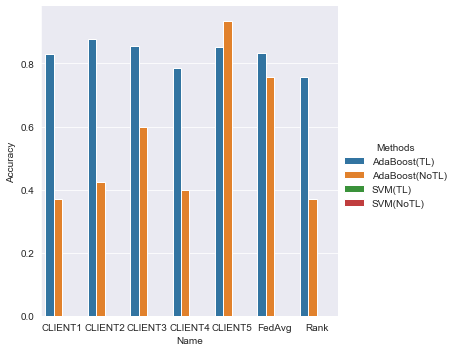

In [43]:
sns.factorplot(x='Name', y='Accuracy', hue='Methods', data=df, kind='bar')
plt.show()

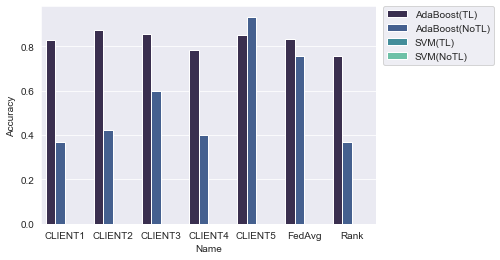

In [44]:
sns.barplot("Name", y="Accuracy", hue='Methods', data=df, palette="mako")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)